In [6]:
from feature_definitions import BOWFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
import os
import pandas as pd
from pprint import pprint

In [7]:
X_train, y_train = [], []
print('Loading data')
data_dir = '/data/movie_reviews/aclImdb/train/'
for f in os.listdir(os.path.join(data_dir, 'neg')):
    X_train.append(open(os.path.join(data_dir, 'neg', f)).read())
    y_train.append(0)
for f in os.listdir(os.path.join(data_dir, 'pos')):
    X_train.append(open(os.path.join(data_dir, 'pos', f)).read())
    y_train.append(1)

Loading data


In [8]:
union_list = []
print ("add Bag of Words features .....")
union_list.append(("tfidf", BOWFeatures()))
pipeline = Pipeline([
        ('union', FeatureUnion(union_list)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10,
                                             random_state=0)),
    ])

print("Now doing training on training set and hyperparameter tuning using the validation set...")
print("pipeline:", [name for name, _ in pipeline.steps])

#X_train = pd.DataFrame({'text': X_train})
pipeline.fit(X_train, y_train)

add Bag of Words features .....
Now doing training on training set and hyperparameter tuning using the validation set...
pipeline: ['union', 'rf']


Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('tfidf',
                                                 BOWFeatures(lowercase=True,
                                                             max_df=1.0,
                                                             min_df=5,
                                                             ngram_range=(1, 1),
                                                             norm='l2',
                                                             token_pattern='\\w+',
                                                             tokenizer=None,
                                                             use_idf=True))],
                              transformer_weights=None, verbose=False)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=

In [9]:
X_test, y_test = [], []
print('Loading data')
data_dir = '/data/movie_reviews/aclImdb/test/'
for f in os.listdir(os.path.join(data_dir, 'neg')):
    X_test.append(open(os.path.join(data_dir, 'neg', f)).read())
    y_test.append(0)
for f in os.listdir(os.path.join(data_dir, 'pos')):
    X_test.append(open(os.path.join(data_dir, 'pos', f)).read())
    y_test.append(1)

Loading data


In [10]:
#X_test = pd.DataFrame({'text': X_test})
pipeline.score(X_test, y_test)

0.81616

In [16]:
tmp = pipeline.predict(X_test)

In [19]:
list(tmp).count(1), list(tmp).count(0)

(13288, 11712)

In [6]:
from nltk.tokenize import sent_tokenize
X_sents, y_sents = [], []
for x, y in zip(X_test, y_test):
    doc = sent_tokenize(x)
    if len(doc)>=20:
        X_sents.append(doc)
        y_sents.append(y)
print(len(X_sents))

2559


In [7]:
X_flat, X_idx = [], []
for i, doc in enumerate(X_sents):
    X_flat.extend(doc)
    X_idx.extend([i]*len(doc))

In [8]:
#X_flat = pd.DataFrame({'text': X_flat})
X_flat_predicted = pipeline.predict_proba(X_flat)[:, 1]

In [9]:
X_traj = [[] for _ in range(len(X_sents))]
for idx, x_pred in zip(X_idx, X_flat_predicted):
    X_traj[idx].append(x_pred)

In [10]:
import numpy as np
from scipy import interpolate
X_interp = []
for x in X_traj:
    x = np.array(x)
    interp = interpolate.interp1d(np.arange(x.size),x)
    X_interp.append(interp(np.linspace(0,x.size-1, 20)))

In [11]:
pos, neg = [],[]
for label, tsne in zip(y_sents, X_interp):
    if label == 0:
        neg.append(tsne)
    else:
        pos.append(tsne)

In [12]:
from sklearn.manifold import TSNE
tsne_pos = TSNE(n_components=2).fit_transform(pos)
tsne_neg = TSNE(n_components=2).fit_transform(neg)
tsne_all = TSNE(n_components=2).fit_transform(pos+neg)




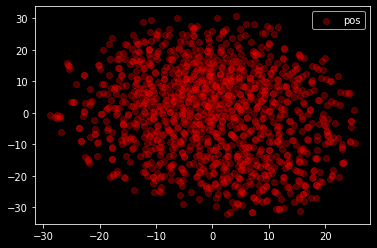

In [13]:
import matplotlib.pyplot as plt
pos_plot = list(map(list, zip(*tsne_pos)))
fig, ax = plt.subplots()
ax.scatter(pos_plot[0], pos_plot[1], c="red", label="pos",
               alpha=0.3)
ax.legend()
plt.show()

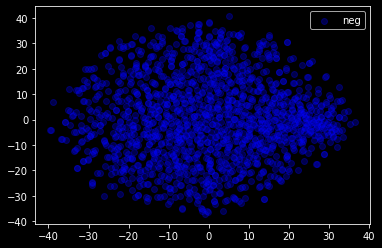

In [14]:
import matplotlib.pyplot as plt
neg_plot = list(map(list, zip(*tsne_neg)))
fig, ax = plt.subplots()
ax.scatter(neg_plot[0], neg_plot[1], c="blue", label="neg",
alpha=0.3)
ax.legend()
plt.show()

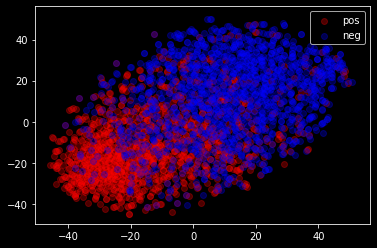

In [15]:
import matplotlib.pyplot as plt
pos_plot = list(map(list, zip(*tsne_all[:len(pos)])))
neg_plot = list(map(list, zip(*tsne_all[len(pos):])))
fig, ax = plt.subplots()
ax.scatter(pos_plot[0], pos_plot[1], c="red", label="pos",
               alpha=0.3)
ax.scatter(neg_plot[0], neg_plot[1], c="blue", label="neg",
alpha=0.3)
ax.legend()
plt.show()

In [16]:
X_interp = np.array(X_interp)
X_shift_interp = X_interp - ( X_interp.mean(axis=1, keepdims=True))
pos, neg = [],[]
for label, tsne in zip(y_sents, X_shift_interp):
    if label == 0:
        neg.append(tsne)
    else:
        pos.append(tsne)

In [17]:
from sklearn.manifold import TSNE
tsne_pos = TSNE(n_components=2).fit_transform(pos)
tsne_neg = TSNE(n_components=2).fit_transform(neg)
tsne_all = TSNE(n_components=2).fit_transform(pos+neg)




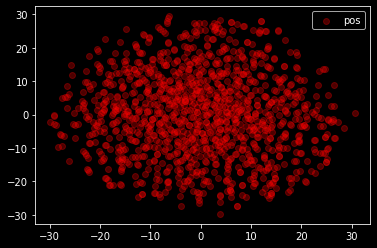

In [18]:
import matplotlib.pyplot as plt
pos_plot = list(map(list, zip(*tsne_pos)))
fig, ax = plt.subplots()
ax.scatter(pos_plot[0], pos_plot[1], c="red", label="pos",
               alpha=0.3)
ax.legend()
plt.show()

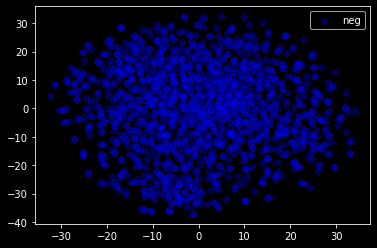

In [19]:
import matplotlib.pyplot as plt
neg_plot = list(map(list, zip(*tsne_neg)))
fig, ax = plt.subplots()
ax.scatter(neg_plot[0], neg_plot[1], c="blue", label="neg",
alpha=0.3)
ax.legend()
plt.show()

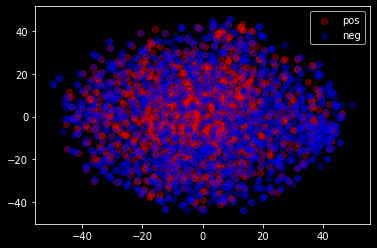

In [20]:
import matplotlib.pyplot as plt
pos_plot = list(map(list, zip(*tsne_all[:len(pos)])))
neg_plot = list(map(list, zip(*tsne_all[len(pos):])))
fig, ax = plt.subplots()
ax.scatter(pos_plot[0], pos_plot[1], c="red", label="pos",
               alpha=0.3)
ax.scatter(neg_plot[0], neg_plot[1], c="blue", label="neg",
alpha=0.3)
ax.legend()
plt.show()